# Weather Data Analysis

Script to analyse weather scraped from http://weather.gc.ca 

In [1]:
import os
import re
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from platform import python_version
python_version()

'3.7.7'

In [2]:
data_dir = 'data'
plot_dir = 'plots'

if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

In [3]:
date = datetime.datetime.now()
year = date.year
os.listdir(os.path.join(data_dir, f"{year}"))

['.DS_Store',
 'past-24-hr-vou-data copy.csv',
 'past-24-hr-vou-data_210106.csv',
 'past-24-hr-vou-data_210104.csv',
 'past-24-hr-vou-data.csv']

In [4]:
def read_data_from_file(data_dir, year, filename, date_label='Date / Time PST'):
    filepath = os.path.join(data_dir, f"{year:d}", filename)
    df = pd.read_csv(filepath)
    df[date_label] = pd.to_datetime(df[date_label])
    return df

def save_data_to_file(df, data_dir, year, filename):
    filepath = os.path.join(data_dir, f"{year:d}", filename)
    df = pd.read_csv(filepath)
    return df

In [5]:
station_code = 'vou'
filename = f'past-24-hr-{station_code}-data.csv'
df = read_data_from_file(data_dir, year, filename)

In [6]:
df.head()

,Date / Time PST,Conditions,Temperature °C,Wind km/h,Relative %,Dew °C,Pressure kPa,Visibility km
0,2021-01-02 16:00:00,NaN,8 (7.8),ENE 2,99,8,99.9,NaN
1,2021-01-02 17:00:00,NaN,7 (7.3),E 2,100,7,100.0,NaN
2,2021-01-02 18:00:00,NaN,7 (6.6),N 3,100,7,100.0,NaN
3,2021-01-02 19:00:00,NaN,6 (6.0),E 2,100,6,100.0,NaN
4,2021-01-02 20:00:00,NaN,6 (5.7),ENE 6,100,6,100.1,NaN


In [7]:
df.tail()

,Date / Time PST,Conditions,Temperature °C,Wind km/h,Relative %,Dew °C,Pressure kPa,Visibility km
169,2021-01-10 19:00:00,NaN,9 (8.7),SE 17,82,6,102.0,NaN
170,2021-01-10 20:00:00,NaN,9 (8.8),ESE 19,84,6,102.0,NaN
171,2021-01-10 21:00:00,NaN,8 (8.2),ESE 18,90,7,102.0,NaN
172,2021-01-10 22:00:00,NaN,8 (7.9),ESE 15,94,7,102.0,NaN
173,2021-01-10 23:00:00,NaN,8 (8.4),SE 19 gust 29,92,7,102.0,NaN


In [8]:
assert sum(df['Date / Time PST'].duplicated()) == 0
first_dt, last_dt = df['Date / Time PST'].min(), df['Date / Time PST'].max()
print(f"First and last records: {first_dt}, {last_dt}")

First and last records: 2021-01-02 16:00:00, 2021-01-10 23:00:00


In [9]:
index = pd.date_range(first_dt.date(), 
                      pd.Timestamp(last_dt.date()) + pd.Timedelta('+23H'), 
                      freq='1H')
records_by_dt = pd.Series(np.nan, index=index)
records_by_dt[df['Date / Time PST']] = 1
print(f"{len(records_by_dt)} records found")

216 records found


In [10]:
# Make sure there are no missing records within the range of data
if not np.all(records_by_dt[first_dt:last_dt] == 1):
    print("Warning: Missing records found")

In [11]:
index = pd.date_range(first_dt.date(), last_dt.date(), freq='1D', name='Date')
data = records_by_dt.values.reshape(-1, 24)
records_by_date = pd.DataFrame(data, index=index)
records_by_date.columns = records_by_date.columns.rename(name='Hour')
records_by_date

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-03,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-04,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-05,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-06,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-07,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-08,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2021-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2021-01-10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
def find_re_match(text, patterns):
    for i, pattern in enumerate(patterns):
        match = re.match(pattern, text)
        if match:
            return i, match
    else:
        return None, None


valid_patterns = [
    r'^\s*calm\s*$',
    r'^\s*[A-Z]+\s+\d+\s*$',
    r'^\s*[A-Z]+\s+\d+\s+gust\s+\d+\s*$'
]

wind_directions = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5
}


def parse_wind_description(text):
    """Parses a wind description string such as 'ENE 2' or
    'SE 32 gust 49' and returns the following data items as
    a dictionary: {
        'Direction': direction, 
        'Degrees': degrees,
        'Speed (km/h)': speed, 
        'Label': 'gust', gust_speed
        'Data': data
    }.
    """
    i, match = find_re_match(text, valid_patterns)
    if not match:
        return None, None, None, None
    text = match.group()
    if i == 0:
        direction, degrees, speed = None, None, 0
        label, data = None, None
    elif i == 1:
        words = text.split()
        direction = words[0]
        degrees = wind_directions[direction]
        speed = int(words[1])
        label, data = None, None
    elif i == 2:
        words = text.split()
        direction = words[0]
        degrees = wind_directions[direction]
        speed = int(words[1])
        label = words[2]
        data = int(words[3])
        assert label == 'gust'
    return {
        'Direction': direction, 
        'Degrees': degrees, 
        'Speed (km/h)': speed, 
        'Label': label,
        'Data': data
    }

assert parse_wind_description('calm') == \
    {'Direction': None, 'Degrees': None, 'Speed (km/h)': 0, 'Label': None, 'Data': None}
assert parse_wind_description('N 10') == \
    {'Direction': 'N', 'Degrees': 0, 'Speed (km/h)': 10, 'Label': None, 'Data': None}
assert parse_wind_description(' ENE  13  ') == \
    {'Direction': 'ENE', 'Degrees': 67.5, 'Speed (km/h)': 13, 'Label': None, 'Data': None}
assert parse_wind_description(' NNW   34 gust 45') == \
    {'Direction': 'NNW', 'Degrees': 337.5, 'Speed (km/h)': 34, 'Label': 'gust', 'Data': 45}

In [13]:
wind_data = pd.DataFrame.from_records(df['Wind km/h'].apply(parse_wind_description), index=df['Date / Time PST'])
wind_data

,Direction,Degrees,Speed (km/h),Label,Data
Date / Time PST,,,,,
2021-01-02 16:00:00,ENE,67.5,2,None,NaN
2021-01-02 17:00:00,E,90.0,2,None,NaN
2021-01-02 18:00:00,N,0.0,3,None,NaN
2021-01-02 19:00:00,E,90.0,2,None,NaN
2021-01-02 20:00:00,ENE,67.5,6,None,NaN
...,...,...,...,...,...
2021-01-10 19:00:00,SE,135.0,17,None,NaN
2021-01-10 20:00:00,ESE,112.5,19,None,NaN
2021-01-10 21:00:00,ESE,112.5,18,None,NaN


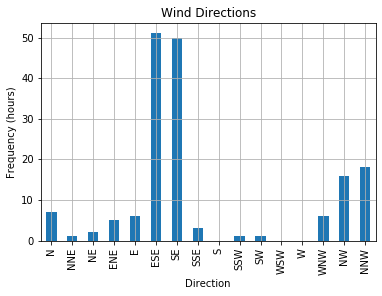

In [14]:
wind_data['Direction'].value_counts().reindex(wind_directions.keys()).plot.bar()
plt.grid()
plt.title('Wind Directions')
plt.xlabel('Direction')
plt.ylabel('Frequency (hours)')
plt.show()

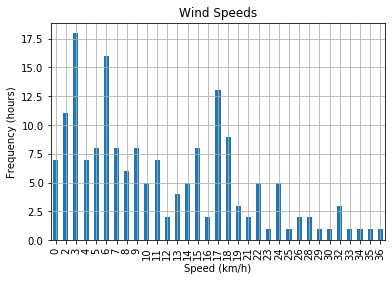

In [15]:
wind_data['Speed (km/h)'].value_counts().sort_index().plot.bar()
plt.grid()
plt.title('Wind Speeds')
plt.ylabel('Frequency (hours)')
plt.xlabel('Speed (km/h)')
plt.show()

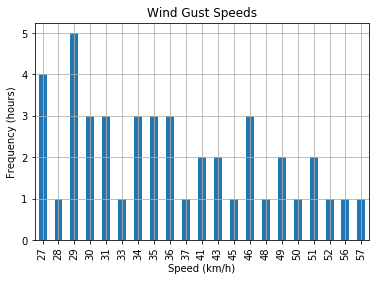

In [16]:
wind_data.loc[wind_data.Label == 'gust', 'Data'].astype(int).value_counts().sort_index().plot.bar()
plt.grid()
plt.title('Wind Gust Speeds')
plt.ylabel('Frequency (hours)')
plt.xlabel('Speed (km/h)')
plt.show()

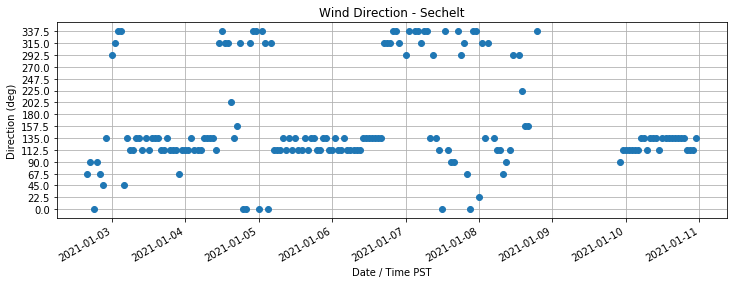

In [17]:
plt.figure(figsize=(12, 4))
wind_data['Degrees'].plot(style='o')
plt.title('Wind Direction - Sechelt')
plt.yticks(np.arange(0, 360, 22.5))
plt.ylabel('Direction (deg)')
plt.grid()
filename = f'{station_code}-wind-direction-time-plot.png'
plt.savefig(os.path.join(plot_dir, filename), dpi=300)
plt.show()